<a href="https://colab.research.google.com/github/TheBilalButt/Intern-at-DevelopersHub/blob/main/Week-04-AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


Columns after flattening: ['Date', 'Close AAPL', 'High AAPL', 'Low AAPL', 'Open AAPL', 'Volume AAPL']
Data shape after preprocessing: (1239, 10)
         Date  Close AAPL  High AAPL   Low AAPL  Open AAPL  Volume AAPL  \
19 2020-01-30   78.307663  78.360856  77.069713  77.502514    126743200   
20 2020-01-31   74.835609  78.019945  74.540629  77.596817    199588400   
21 2020-02-03   74.630096  75.797926  73.072985  73.575900    173788400   
22 2020-02-04   77.093918  77.284932  75.831787  76.237988    136616400   
23 2020-02-05   77.722557  78.522873  77.118089  78.223051    118826800   

       SMA_20  Rolling_STD  Upper_Band  Lower_Band  
19  75.446481     2.022695   79.491871   71.401092  
20  75.557220     1.917760   79.392739   71.721700  
21  75.692984     1.733599   79.160183   72.225786  
22  75.923288     1.584976   79.093240   72.753336  
23  76.202069     1.360206   78.922480   73.481658  
Number of anomalies detected: 62
           Date  Close AAPL   High AAPL    Low AAPL  

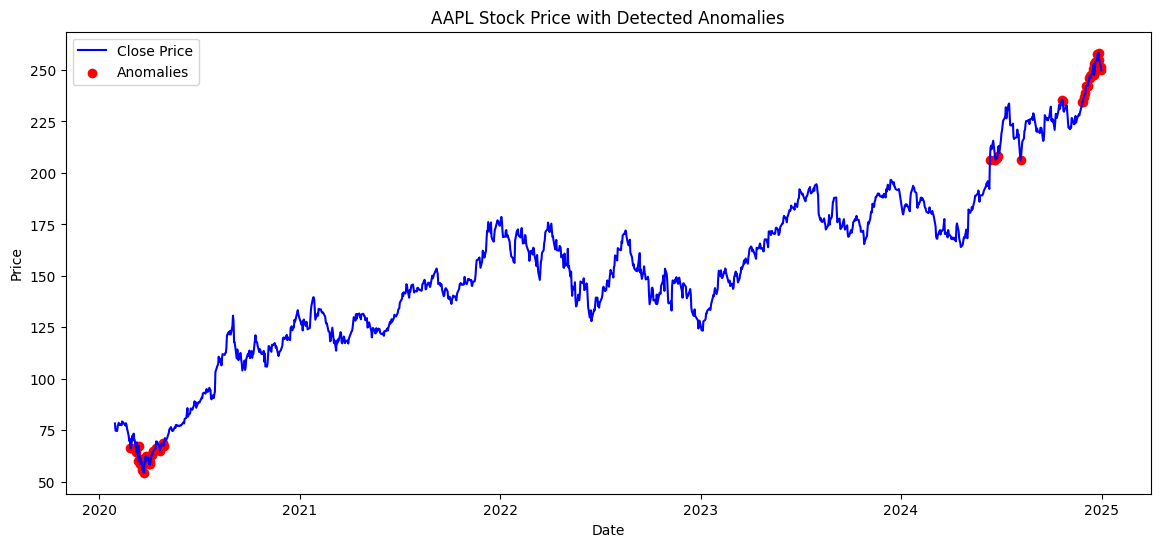

In [41]:
# ---------------------------------------------------------------
# TASK 1: Financial Time-Series Anomaly Detection
# ---------------------------------------------------------------
# Objective:
# Identify anomalies in stock price trends using historical data
# from Yahoo Finance, calculate financial indicators, and apply
# Isolation Forest for anomaly detection.
#
# ---------------------------------------------------------------
# Author: Your Name
# Date: June 2025
# ---------------------------------------------------------------

# STEP 1. INSTALL LIBRARIES
!pip install yfinance plotly scikit-learn pandas matplotlib

# STEP 2. IMPORT LIBRARIES
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import plotly.graph_objects as go

# STEP 3. DOWNLOAD HISTORICAL STOCK DATA
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Downloading data
data = yf.download(ticker, start=start_date, end=end_date)
data.reset_index(inplace=True)

# Flatten MultiIndex columns if necessary
if isinstance(data.columns, pd.MultiIndex):
    data.columns = [' '.join(col).strip() for col in data.columns.values]

# Print columns to confirm structure
print(f"Columns after flattening: {data.columns.tolist()}")

# STEP 4. PREPROCESSING AND FINANCIAL INDICATORS

# Identify the Close price column dynamically
close_col = [col for col in data.columns if 'Close' in col][0]

# Calculate 20-day Simple Moving Average (SMA)
data['SMA_20'] = data[close_col].rolling(window=20).mean()

# Calculate 20-day Rolling Standard Deviation
data['Rolling_STD'] = data[close_col].rolling(window=20).std()

# Calculate Bollinger Bands
data['Upper_Band'] = data['SMA_20'] + (data['Rolling_STD'] * 2)
data['Lower_Band'] = data['SMA_20'] - (data['Rolling_STD'] * 2)

# Drop rows with NaN values in these columns
required_columns = [close_col, 'SMA_20', 'Rolling_STD', 'Upper_Band', 'Lower_Band']
data.dropna(subset=required_columns, inplace=True)

# Print shape and sample data
print(f"Data shape after preprocessing: {data.shape}")
print(data.head())

# STEP 5. APPLY ISOLATION FOREST
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(data[[close_col]])

# Predict anomalies (-1 = anomaly, 1 = normal)
data['Anomaly'] = model.predict(data[[close_col]])

# Display anomalies
print(f"Number of anomalies detected: {len(data[data['Anomaly'] == -1])}")
print(data[data['Anomaly'] == -1])

# STEP 6. VISUALIZATION USING MATPLOTLIB
plt.figure(figsize=(14,6))
plt.plot(data['Date'], data[close_col], label='Close Price', color='blue')
plt.scatter(data[data['Anomaly'] == -1]['Date'],
            data[data['Anomaly'] == -1][close_col],
            color='red', label='Anomalies')
plt.title(f'{ticker} Stock Price with Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# (Optional) STEP 7. VISUALIZATION USING PLOTLY
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data[close_col],
                         mode='lines', name='Close Price'))
fig.add_trace(go.Scatter(x=data[data['Anomaly'] == -1]['Date'],
                         y=data[data['Anomaly'] == -1][close_col],
                         mode='markers', name='Anomalies',
                         marker=dict(color='red', size=8)))
fig.update_layout(title=f'{ticker} Stock Price with Anomalies',
                  xaxis_title='Date', yaxis_title='Price')
fig.show()

# ---------------------------------------------------------------
# END OF TASK 1
# ---------------------------------------------------------------
